<a href="https://colab.research.google.com/github/mtryptnkr-study/Multi-model-Transportation-Optimization/blob/main/Multi_modal_Transportation_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## Loading the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multi-modal Transportation Optimization/Datasets/features.csv')
stores= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multi-modal Transportation Optimization/Datasets/stores.csv')
test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multi-modal Transportation Optimization/Datasets/test.csv')
train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multi-modal Transportation Optimization/Datasets/train.csv')

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Data Preprocessing

Merging Datasets

In [ ]:
# Merging Datasets
data = train.merge(stores, how='left', on='Store')
data = data.merge(features, how='left', on=['Store', 'Date'])

In [ ]:
# Converting Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Sorting date by Date
data = data.sort_values(by='Date')

## Handling the Missing Values

In [ ]:
# Identifying the numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [ ]:
# Filling the missing values for numeric columns with median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [ ]:
# Flling the values for categorical columns with the mode
data = data.fillna(data.mode().iloc[0])

## Feature Engineering

In [ ]:
# Extracting additional features from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [ ]:
# Checking if categorical columns exist before encoding
categorical_columns = data.select_dtypes(include=['object']).columns

In [ ]:
# One-Hot Encoding for categorical features
if len(categorical_columns) > 0:
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

## Preparing the Data for Modeling

In [ ]:
# Defining features (X) and target (y)
X = data.drop(columns = ['Weekly_Sales', 'Date'])
y = data['Weekly_Sales']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [ ]:
# Training a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [ ]:
# Making Predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculating Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 12007306.061619846
Mean Absolute Error: 1334.5045145361387
R-squared: 0.9769090605697065


## Feature Importance

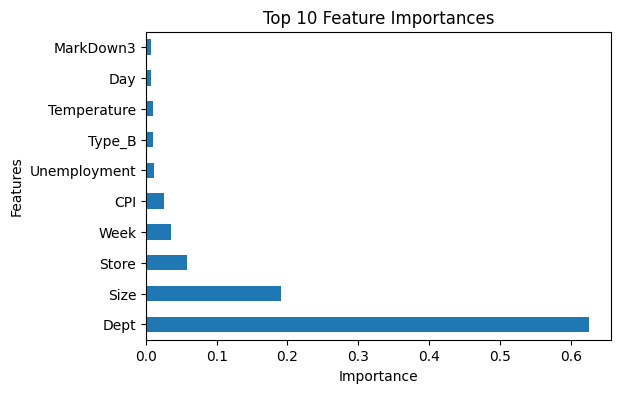

In [ ]:
# Plotting feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Visualization

In [ ]:
# Visualizaing sales trends using Plotly
# fig = px.line(data, x='Date', y='Weekly_Sales', title='Sales Trend Over Time', labels={'Date': 'Date', 'Weekly_Sales': 'Weekly Sales'})
# fig.update_layout(xaxis_title='Date', yaxis_title='Weekly Sales')
# fig.show()

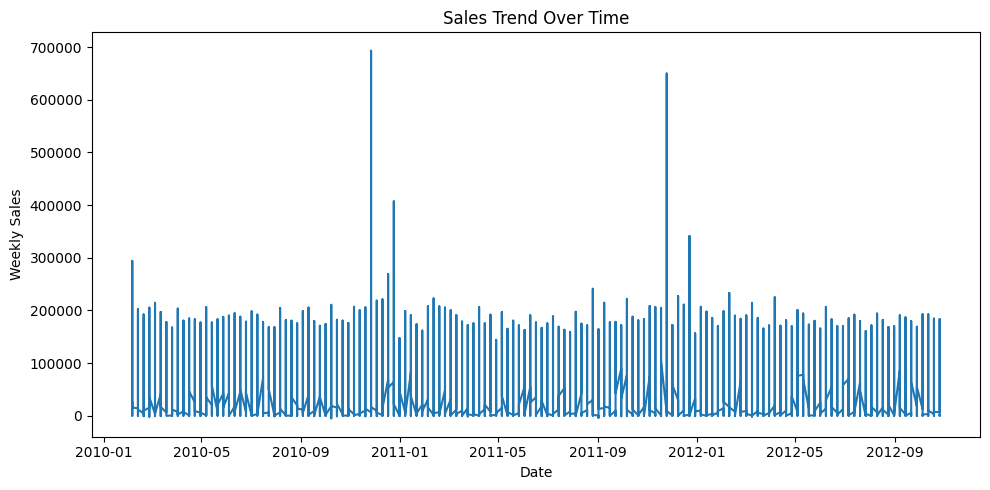

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Weekly_Sales'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

In [ ]:
# Visualizing sales by store type if available
store_type_columns = [col for col in data.columns if 'StoreType' in col]
if len(store_type_columns) > 0:
    fig = px.box(data, x=store_type_columns[0], y='Weekly_Sales', title='Sales Distribution by Store Type', labels={'Weekly_Sales': 'Weekly Sales'})
    fig.update_layout(xaxis_title='Store Type', yaxis_title='Weekly Sales')
    fig.show()

In [131]:
# Visualizing weekly sales by different features
# fig = px.box(data, x='Month', y='Weekly_Sales', title='Sales Distribution by Month', labels={'Month': 'Month', 'Weekly_Sales': 'Weekly Sales'})
# fig.update_layout(xaxis_title='Month', yaxis_title='Weekly Sales')
# fig.show()

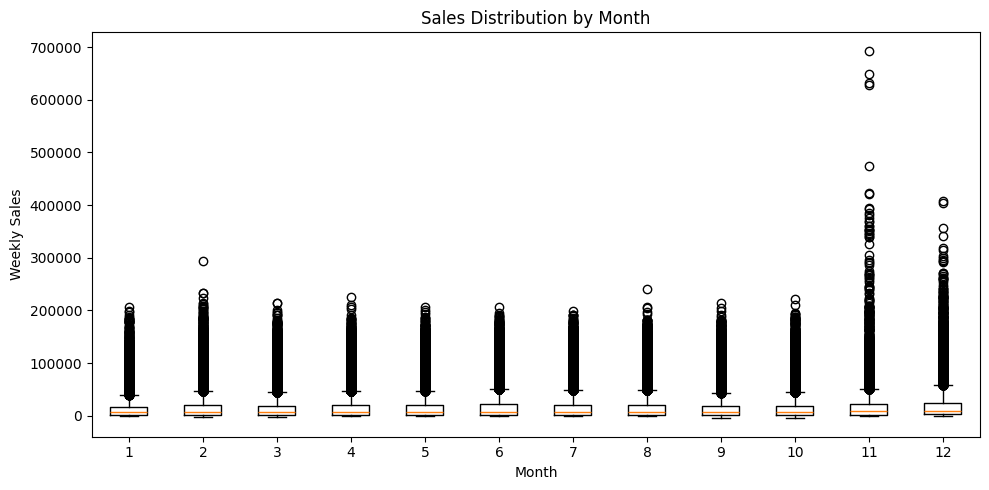

In [134]:
data['Month'] = data['Month'].astype(int)

# Group weekly sales by month
monthly_sales = [
    data[data['Month'] == m]['Weekly_Sales'].values
    for m in sorted(data['Month'].unique())
]

plt.figure(figsize=(10, 5))
plt.boxplot(
    monthly_sales,
    tick_labels=sorted(data['Month'].unique()),
    showfliers=True
)

plt.title("Sales Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Weekly Sales")

plt.tight_layout()
plt.show()


In [135]:
# fig = px.box(data, x='DayOfWeek', y='Weekly_Sales', title='Sales Distribution by Day of the Week', labels={'DayOfWeek': 'Day of Week', 'Weekly_Sales': 'Weekly Sales'})
# fig.update_layout(xaxis_title='Day of the Week', yaxis_title='Weekly Sales')
# fig.show()

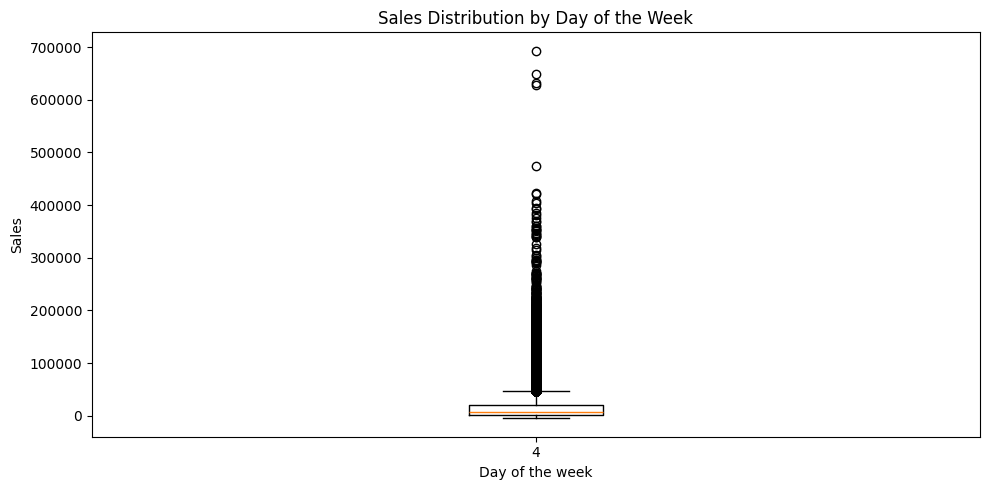

In [140]:
# Ensure DayOfWeek is integer
data['DayOfWeek'] = data['DayOfWeek'].astype(int)

# Sort day-of-week values
days = sorted(data['DayOfWeek'].unique())

# Group weekly sales by day of week
daily_sales = [
    data[data['DayOfWeek'] == d]['Weekly_Sales'].values
    for d in days
]

# Create the boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(
    daily_sales,
    positions=days,
    showfliers=True
)

plt.title("Sales Distribution by Day of the Week")
plt.xlabel("Day of the week")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

